# Gráficos de dispersión para Series de Tiempo

Hasta este momento hemos visto herramientas gráficas (gráficos de Series de Tiempo, gráficos estacionales) que nos permiten visualizar Series de Tiempo de manera individual.

Pero en ocasiones podemos tener múltiples Series de Tiempo y lo que nos interesa es analizar posibles relaciones entre pares de Series de Tiempo.

Así que en esta lección veremos cómo generar gráficos de dispersión y combinarlos con el concepto de correlación para analizar posibles relaciones entre pares de Series de Tiempo.

Veamos este tipo de gráficos en detalle así como el análisis que podemos realizar en estos casos.

## 1. El set de datos

Usaremos el set *vars_clima.csv* que contiene un registro de las siguientes variables climatológicas para una zona geográfica específica y en el periodo de 2014-01-01 a 2014-09-26 (frecuencia = 1 hora):

- *p (mbar)*: presión en milibars
- *T (degC)*: temperatura en grados centígrados
- *Tdew (degC)*: punto de rocío (en grados centígrados)
- *rh (%)*: humedad relativa (porcentage)
- *wd (deg)*: dirección del viento (en grados con respecto al Sur magnético)

Comencemos leyendo este set de datos:

In [1]:
# Preparar dataset
import pandas as pd
ruta = '../datasets/EDA/'

df = pd.read_csv(ruta + 'vars_clima.csv',
                parse_dates=['fecha'],
                     index_col='fecha'
                    )
df

,p (mbar),T (degC),Tdew (degC),rh (%),wd (deg)
fecha,,,,,
2014-01-01 00:00:00,987.18,-0.07,-4.34,72.80,190.5
2014-01-01 01:00:00,986.81,1.18,-4.53,65.55,173.7
2014-01-01 02:00:00,986.44,1.56,-4.51,63.87,192.7
2014-01-01 03:00:00,986.15,2.10,-4.35,62.19,208.0
2014-01-01 04:00:00,986.26,2.94,-4.66,57.22,224.4
...,...,...,...,...,...
2014-09-24 12:00:00,987.01,13.69,6.29,60.85,174.1
2014-09-24 13:00:00,986.55,14.19,6.80,61.01,173.0
2014-09-24 14:00:00,986.21,14.99,6.70,57.54,202.5


Y generemos los gráficos individuales de cada una de las 4 series de tiempo:

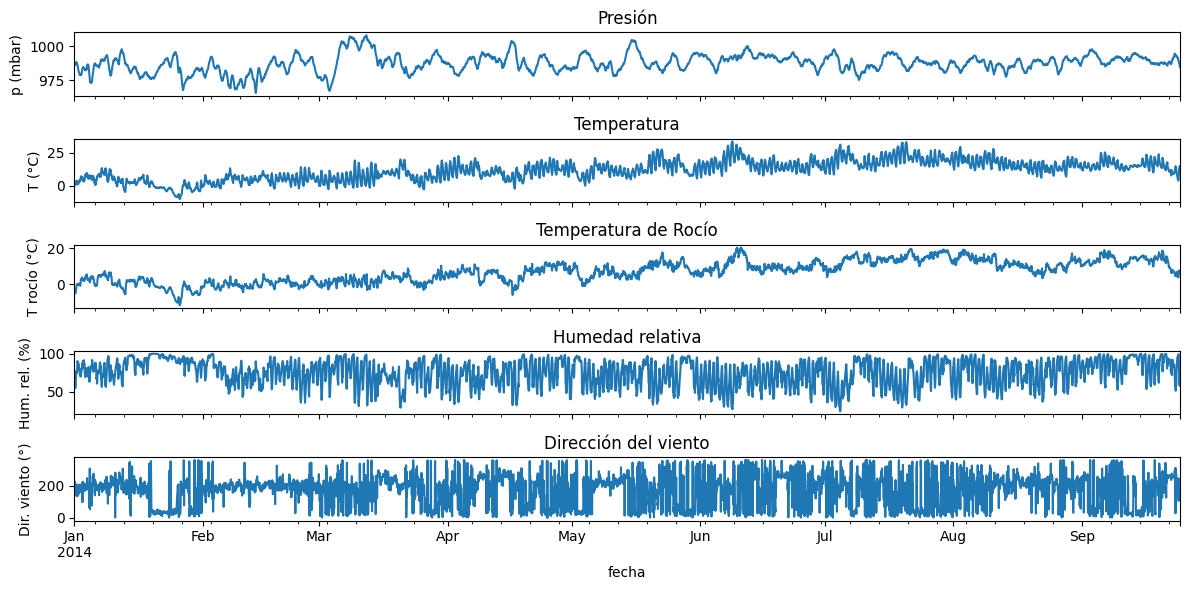

In [2]:
import matplotlib.pyplot as plt

# Crear grilla
fig, ax = plt.subplots(5,1, figsize=(12,6), sharex=True)

# Gráficos individuales

df['p (mbar)'].plot(ax=ax[0])
df['T (degC)'].plot(ax=ax[1])
df['Tdew (degC)'].plot(ax=ax[2])
df['rh (%)'].plot(ax=ax[3])
df['wd (deg)'].plot(ax=ax[4])

# Etiquetas eje y y títulos
ax[0].set_ylabel('p (mbar)')
ax[0].set_title('Presión')
ax[1].set_ylabel('T (°C)')
ax[1].set_title('Temperatura')
ax[2].set_ylabel('T rocío (°C)')
ax[2].set_title('Temperatura de Rocío')
ax[3].set_ylabel('Hum. rel. (%)')
ax[3].set_title('Humedad relativa')
ax[4].set_ylabel('Dir. viento (°)')
ax[4].set_title('Dirección del viento')
fig.tight_layout()


## 2. Gráficos de dispersión básicos y cálculo de correlación

Podemos intentar determinar si ciertos pares de variables están correlacionados usando gráficos de dispersión.

Por ejemplo, veamos si existe algún grado de relación entre la humedad relativa y la dirección del viento. Para ello podemos generar un gráfico de dispersión (Lección 11 del curso Estadística Descriptiva: "Comparación de datos numéricos vs. numéricos"), para lo cual simplemente ponemos en cada eje del gráfico bidimensional una de las variables a comparar:

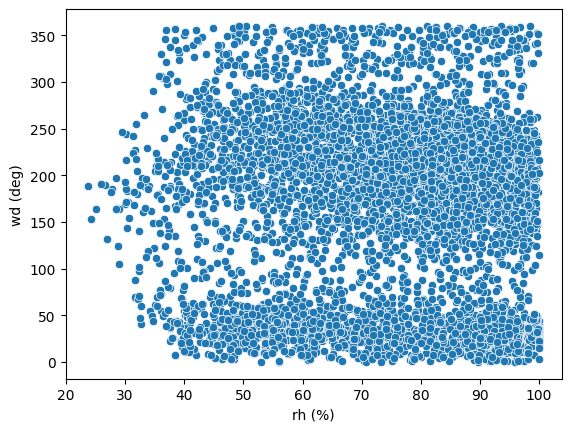

In [4]:
import seaborn as sns

ax = sns.scatterplot(data=df, x='rh (%)', y='wd (deg)')

Y acá podemos ver que las dos Series de Tiempo no guardan relación alguna. Esto lo podemos corroborar calculando por ejemplo el coeficiente de correlación (Lección 2 curso Probabilidad Nivel Avanzado: "La correlación"):

In [5]:
df['rh (%)'].corr(df['wd (deg)'])

-0.04976335897415786

## 3. Matriz de dispersión y matriz de correlación

Sin embargo, en este caso tenemos 4 diferentes variables así que podemos realizar 6 diferentes comparaciones entre pares de variables.

En este caso no resulta práctico re-escribir el código anterior 6 veces y lo mejor es generar una matriz de dispersión que representará los gráficos de dispersión de las 6 diferentes combinaciones.

Esta matriz de dispersión la podemos calcular de forma sencilla usando el método "scatter_matrix" de Pandas:

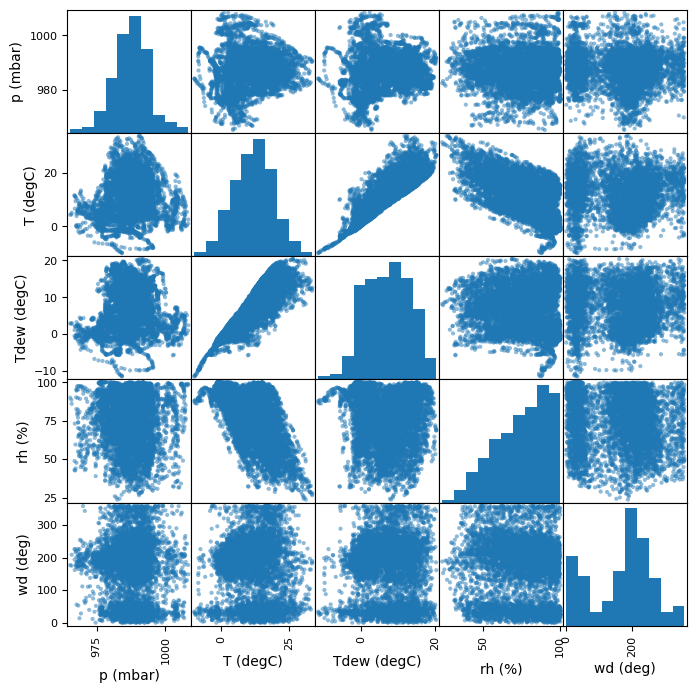

In [3]:
# En ocasiones se debe incluir para mostrar el gráfico resultante
%matplotlib inline 

pd.plotting.scatter_matrix(df, figsize=(8,8));

Y podemos complementar el gráfico anterior con los valores de la correlación entre pares de Series de Tiempo, para lo cual podemos usar el método "corr()" de Pandas:

In [4]:
df.corr()

,p (mbar),T (degC),Tdew (degC),rh (%),wd (deg)
p (mbar),1.000000,0.103193,0.091369,-0.044718,-0.078561
T (degC),0.103193,1.000000,0.843078,-0.536585,-0.021086
Tdew (degC),0.091369,0.843078,1.000000,-0.008154,-0.042084
rh (%),-0.044718,-0.536585,-0.008154,1.000000,-0.049763
wd (deg),-0.078561,-0.021086,-0.042084,-0.049763,1.000000


Pero lo más adecuado es combinar estos dos elementos: la matriz de dispersión y en la misma superponer las correspondientes correlaciones:

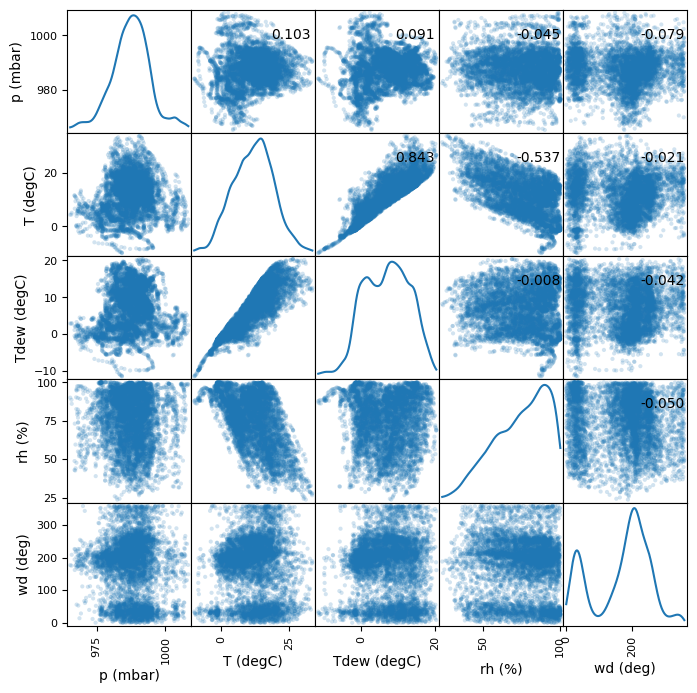

In [5]:
# Crear gráfico de dispersión básico
ax = pd.plotting.scatter_matrix(df, alpha=0.2, diagonal='kde', figsize=(8,8))

# Calcular coeficientes de correlación
corr = df.corr().to_numpy()

# Agregar etiquetas únicamente a los coeficientes por encima de la diagonal
for i, j in zip(*plt.np.triu_indices_from(ax, k=1)):
    ax[i, j].annotate(f'{corr[i,j]:.3f}', (0.8, 0.8), 
                      xycoords='axes fraction', ha='center', va='center')

Y con esto ahora sí podemos realizar un análisis exploratorio básico. Por ejemplo, podemos mencionar que:

- Las series temperatura ("T (degC)") y temperatura de rocío ("Tdew (degC)") presentan una correlación positiva de 0.843. Esto quiere decir que que el punto de rocío se incrementa con el valor de la temperatura
- Las series temperatura ("T (degC)") y humedad relativa ("rh (%)") tienen un grado moderado de correlación negativa de -0.537. Esto quiere decir que a medida que la temperatura aumenta la humedad relativa tiende a disminuir
- Para los demás pares de Series no existen niveles de correlación de importancia

Además, si analizamos las distribuciones en la diagonal principal, podemos ver que la temperatura, la presión y el punto de rocío tienen distribuciones normales (o Gaussianas) mientras que la humedad relativa tiene una distribución sesgada hacia la derecha y la velocidad del viento una distribución bimodal. Esto puede resultar útil para aplicar transformaciones a las Series o si queremos luego realizar manejo de valores extremos (si estos existen).

## 4. Aspectos a tener en cuenta

- Podemos usar los gráficos de dispersión en conjunto con el índice de correlación para encontrar posibles relaciones entre pares de Series de Tiempo
- Cuando tenemos más de dos variables lo más práctico es generar un gráfico de matriz de dispersión ("scatter_matrix" de Pandas) y sobre éste superponer los valores de la correlación entre pares de Series (que se pueden obtener con el método "corr" de Pandas).